___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 75
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_man = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin-1')
df_man.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [3]:
df_woman = pd.read_csv("ANSUR II FEMALE Public.csv",encoding='latin-1')
df_woman.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
df_man.columns == df_woman.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
df_man.shape, df_woman.shape

((4082, 108), (1986, 108))

In [6]:
df_man["subjectid"].nunique()

4082

In [7]:
df_woman["SubjectId"].nunique()

1986

In [8]:
df_orginal = pd.concat([df_man.drop(columns="subjectid"), df_woman.drop(columns="SubjectId")])
df_orginal.shape

(6068, 107)

In [9]:
df_orginal.reset_index(drop=True, inplace=True)

In [10]:
df = df_orginal.copy()
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,1

## Explore Data

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [12]:
df.shape

(6068, 107)

In [13]:
def first_look(col):
    print('column name : ', col)
    print("--"*20)
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number of Nulls  : ', df[col].isnull().sum())
    print('Number of Uniques: ', df[col].nunique())
    print('Type of columns: ', df[col].dtype)
    print("--"*20)
    print('Unique values of columns: ', df[col].unique())
    print("--"*20)
    print(df[col].value_counts(dropna = False).sort_index())
    print("--"*20)
    print(df[col].value_counts(dropna = False))
    print("##"*40)
    print()

In [14]:
for i in df.select_dtypes(include="object").columns:
    first_look(i)

column name :  Gender
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  2
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Male' 'Female']
----------------------------------------
Female    1986
Male      4082
Name: Gender, dtype: int64
----------------------------------------
Male      4082
Female    1986
Name: Gender, dtype: int64
################################################################################

column name :  Date
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  253
Type of columns:  object
----------------------------------------
Unique values of columns:  ['4-Oct-10' '12-Oct-10' '6-Oct-10' '7-Oct-10' '13-Oct-10' '14-Oct-10'
 '15-Oct-10' '18-Oct-10' '19-Oct-10' '20-Oct-10' '21-Oct-10' '22-Oct-10'
 '25-Oct-10' '26-Oct-10' '27-Oct-10' '28-Oct-10' '29-Oct-10' '2-Nov-10'
 '4-Nov-10' '17-Nov-10' '16-Nov-10' '18-N

California       446
New York         420
Texas            397
Indiana          266
Oklahoma         221
                ... 
Ivory Coast        1
Belarus            1
New Zealand        1
South America      1
Denmark            1
Name: SubjectsBirthLocation, Length: 152, dtype: int64
################################################################################

column name :  Ethnicity
----------------------------------------
Per_of_Nulls   :  % 76.58
Number of Nulls  :  4647
Number of Uniques:  209
Type of columns:  object
----------------------------------------
Unique values of columns:  [nan 'Mexican Yaqui' 'Puerto Rican' 'Colombian' 'Filipino' 'Salvadoran'
 'Mexican' 'Chinese Vietnamese' 'Caribbean Islander' 'Lakota Sioux'
 'Vietnamese' 'Peruvian' 'Nicaraguan Salvadoran'
 'Chinese Hawaiian Japanese Polynesian' 'Taiwanese' 'Cherokee'
 'Arab or Middle Eastern Honduran' 'Guamanian/Chamorro' 'Japanese'
 'Arab or Middle Eastern' 'Chinese Japanese Korean Thai'
 'Dominican Puerto Ric

In [15]:
df["Gender"] = df["Gender"].replace({"Female" : 0, "Male":1})
df = df.drop(columns=["Date","PrimaryMOS","Ethnicity","Installation"])
df.shape

(6068, 103)

In [16]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 103 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [17]:
# for i in df.columns:
#     print(f"Null values in {i} column is =  %", round(df[i].isnull().sum()/df.shape[0]*100,3))

In [18]:
df.duplicated().value_counts()

False    6068
dtype: int64

### Target Column

In [19]:
df["DODRace"].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

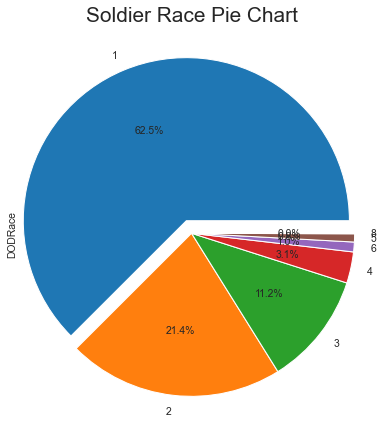

In [20]:
plt.figure(figsize=(10,6))
df["DODRace"].value_counts().plot.pie( autopct="%.1f%%",radius=1.2, fontsize=10, explode=[0.1,0,0,0,0,0,0]);
plt.title("Soldier Race Pie Chart", pad=40, fontsize=20);

In [21]:
df = df.drop(index=df[df["DODRace"].isin([4,5,6,8])].index)
df.shape

(5769, 103)

### Demographic Data

In [22]:
df.iloc[:,93:]

,Gender,Component,Branch,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,1,Regular Army,Combat Arms,North Dakota,1,1,41,71,180,Right hand
1,1,Regular Army,Combat Support,New York,1,1,35,68,160,Left hand
2,1,Regular Army,Combat Support,New York,2,2,42,68,205,Left hand
3,1,Regular Army,Combat Service Support,Wisconsin,1,1,31,66,175,Right hand
4,1,Regular Army,Combat Service Support,North Carolina,2,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...
6063,0,Army National Guard,Combat Support,Texas,3,3,51,67,180,Right hand
6064,0,Army National Guard,Combat Support,Texas,3,3,40,63,150,Right hand
6065,0,Army National Guard,Combat Support,Texas,2,2,40,66,168,Right hand
6066,0,Army National Guard,Combat Support,Texas,3,3,31,63,133,Right hand


#### Gender 

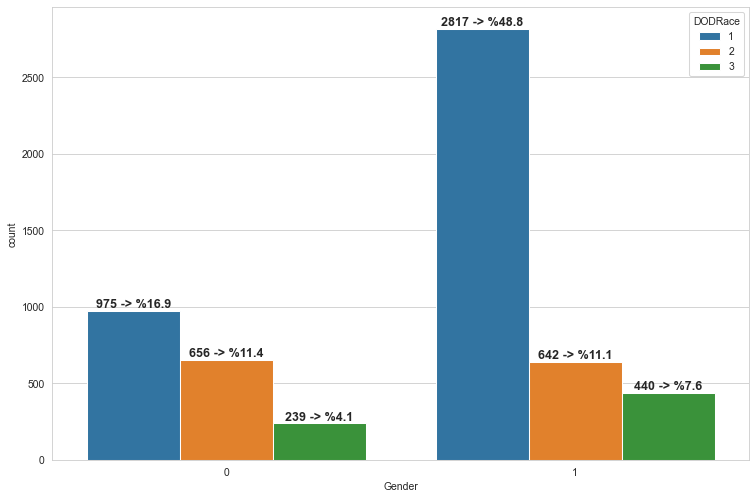

In [23]:
g = sns.countplot(x = "Gender", data=df, hue="DODRace")
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{h/df["DODRace"].count()*100:0.1f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=12, weight='bold')

#### Component 

In [24]:
df["Component"].value_counts()

Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: Component, dtype: int64

In [25]:
df.groupby("Component")["DODRace"].value_counts(normalize=True)

Component            DODRace
Army National Guard  1         0.712
                     2         0.191
                     3         0.097
Army Reserve         1         0.551
                     2         0.251
                     3         0.198
Regular Army         1         0.617
                     2         0.253
                     3         0.130
Name: DODRace, dtype: float64

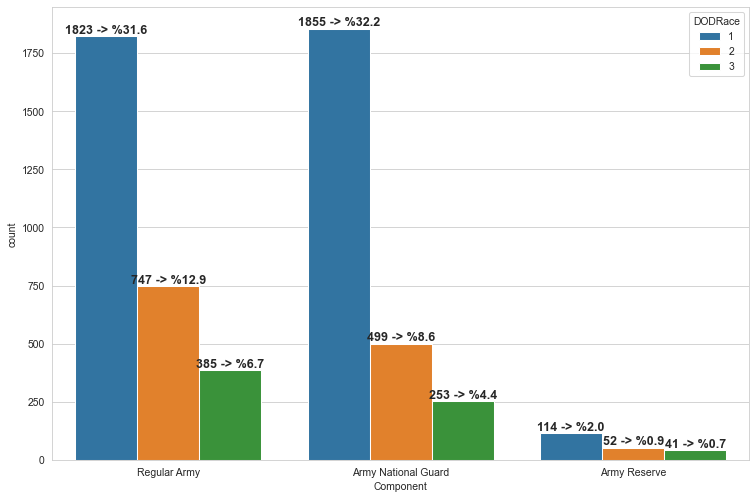

In [26]:
g = sns.countplot(x = "Component", data=df, hue="DODRace")
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{h/df["DODRace"].count()*100:0.1f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=12, weight='bold')

#### Branch

In [27]:
df["Branch"].value_counts()

Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: Branch, dtype: int64

In [28]:
df.groupby("Branch")["DODRace"].value_counts(normalize=True)

Branch                  DODRace
Combat Arms             1         0.760
                        3         0.125
                        2         0.115
Combat Service Support  1         0.633
                        2         0.247
                        3         0.121
Combat Support          1         0.593
                        2         0.306
                        3         0.101
Name: DODRace, dtype: float64

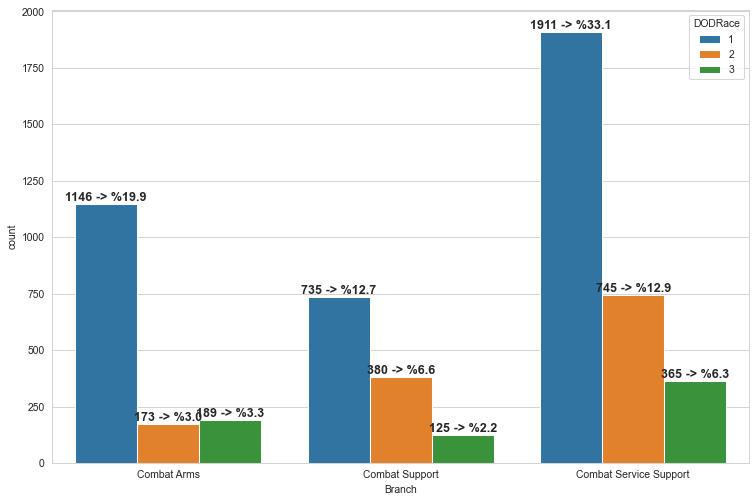

In [29]:
g = sns.countplot(x = "Branch", data=df, hue="DODRace")
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{h/df["DODRace"].count()*100:0.1f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=12, weight='bold')

#### SubjectsBirthLocation

In [30]:
df["SubjectsBirthLocation"].nunique()

136

In [31]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
df["SubjectsBirthCountry"] = df["SubjectsBirthLocation"].apply(lambda x: 1 if x in state_names else 0)
df["SubjectsBirthCountry"].value_counts()

1    5324
0     445
Name: SubjectsBirthCountry, dtype: int64

In [32]:
df[df["SubjectsBirthCountry"] == 1]["SubjectsBirthLocation"].value_counts()

California        417
New York          411
Texas             386
Indiana           264
Illinois          210
Florida           210
Oklahoma          205
Minnesota         194
Michigan          194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
New Jersey         88
Puerto Rico        88
Missouri           83
Maryland           78
Colorado           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
South Dakota       53
Arkansas           53
Oregon             40
Connecticut        36
Nebraska           30
Utah               27
West Virginia      26
Nevada             21
Idaho              20
Rhode Island       18
Hawaii             18
Maine              18
North Dakota       18
Delaware           17
New Mexico

In [33]:
# Drop below 100 values of location in US
location_name_min =df[df["SubjectsBirthCountry"] == 1]["SubjectsBirthLocation"].value_counts().tail(33).index
df[df["SubjectsBirthLocation"].isin(location_name_min)].groupby("SubjectsBirthLocation")["DODRace"].value_counts()

SubjectsBirthLocation  DODRace
Alaska                 1           7
Arizona                1          59
                       3          11
                       2           5
Arkansas               1          43
                                  ..
West Virginia          2           2
Wisconsin              1          94
                       2           3
                       3           2
Wyoming                1           7
Name: DODRace, Length: 73, dtype: int64

In [34]:
df.loc[df[df["SubjectsBirthLocation"].isin(location_name_min)].index,"SubjectsBirthLocation"] = "Other"
df.loc[df[df["SubjectsBirthCountry"] == 0].index,"SubjectsBirthLocation"] = "Other"

#### SubjectNumericRace

In [35]:
df[["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
31                  3           112
51                  1            99
                               ... 
8                   3             1
18                  3             1
28                  3             1
38                  1             1
42351               2             1
Length: 61, dtype: int64

In [36]:
df.drop(columns="SubjectNumericRace", inplace=True)

#### Age

In [37]:
df.groupby("DODRace")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
DODRace,,,,,,,,
1,3792.000,29.536,8.619,18.000,23.000,27.000,35.000,58.000
2,1298.000,30.824,9.107,17.000,23.000,29.000,38.000,58.000
3,679.000,29.115,8.246,18.000,23.000,27.000,34.000,56.000


<AxesSubplot:xlabel='DODRace', ylabel='Age'>

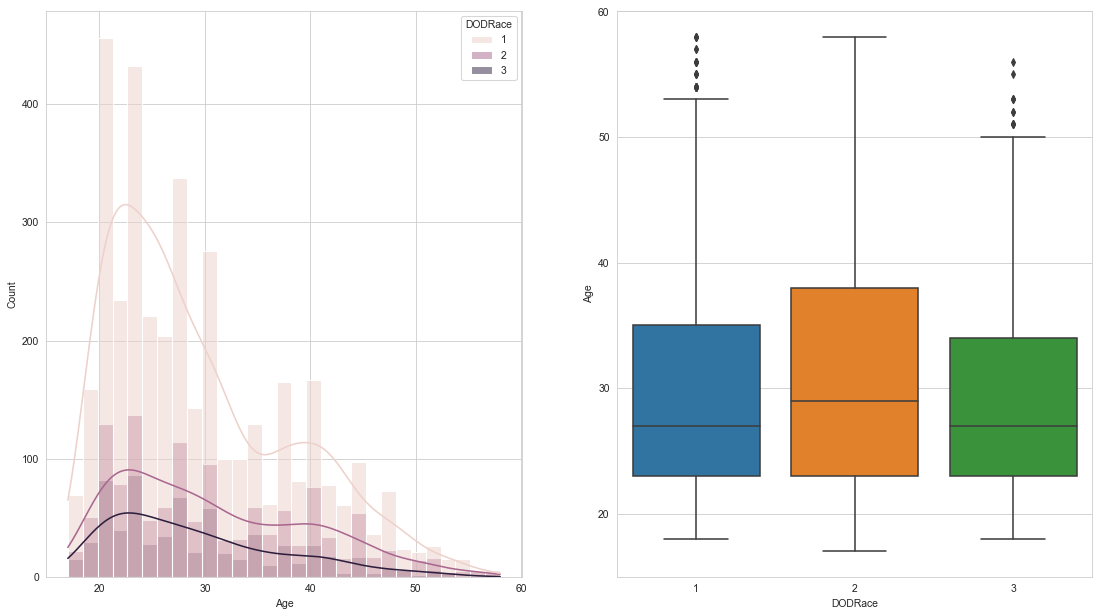

In [38]:
fig, ax = plt.subplots(1,2, figsize = (18,10))
sns.histplot(x="Age", data=df, kde=True, hue="DODRace", ax=ax[0])
sns.boxplot(x="DODRace", y="Age", data=df, ax=ax[1])

#### Height & Stature

In [39]:
df[["Heightin","stature"]].head()

,Heightin,stature
0,71,1776
1,68,1702
2,68,1735
3,66,1655
4,77,1914


In [40]:
(df["stature"] / 10 - df["Heightin"]*2.54).sample(10)

5685   -0.880
1839   -0.900
3496    2.060
283    -3.640
3173   -0.720
1798    1.900
5502    0.500
572     0.780
1183   -5.120
1474    4.500
dtype: float64

In [41]:
(df["stature"] / 10 - df["Heightin"]*2.54).mean()

-1.9392511700468023

In [42]:
df = df.drop(columns=["Heightin"])

#### Weightlbs & weightkg

In [43]:
df[["Weightlbs","weightkg"]].head()

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946


In [44]:
(df["weightkg"] / 10 - df["Weightlbs"]*0.4536).sample(10)

2848   -0.956
6026   -2.136
3698    0.444
2277    0.883
3349   -1.012
2292    2.264
4278   -0.886
4773    1.556
1697   -0.695
4508    6.560
dtype: float64

In [45]:
(df["weightkg"] / 10 - df["Weightlbs"]*0.4536).mean()

0.45581043508407004

In [46]:
df = df.drop(columns=["Weightlbs"])

#### WritingPreference

In [47]:
df["WritingPreference"].value_counts()

Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: WritingPreference, dtype: int64

In [48]:
df[df["WritingPreference"] != "Right hand"]["DODRace"].value_counts()

1    465
2    163
3     53
Name: DODRace, dtype: int64

In [49]:
df.shape

(5769, 101)

### Anthropometric Data

In [50]:
column_list = set()
df_corr = df.corr()
for i in df_corr.columns:
    result = df_corr[i][(abs(df_corr[i])>0.9) & (abs(df_corr[i])!=1)]
    if len(result.index)>0:
        for j in result.index:
            print(f"Corelation with {i} and {j} is higher than 0.9")
            column_list.add(j)

Corelation with abdominalextensiondepthsitting and waistcircumference is higher than 0.9
Corelation with abdominalextensiondepthsitting and waistdepth is higher than 0.9
Corelation with acromialheight and axillaheight is higher than 0.9
Corelation with acromialheight and cervicaleheight is higher than 0.9
Corelation with acromialheight and chestheight is higher than 0.9
Corelation with acromialheight and iliocristaleheight is higher than 0.9
Corelation with acromialheight and kneeheightsitting is higher than 0.9
Corelation with acromialheight and stature is higher than 0.9
Corelation with acromialheight and suprasternaleheight is higher than 0.9
Corelation with acromialheight and tenthribheight is higher than 0.9
Corelation with acromialheight and waistheightomphalion is higher than 0.9
Corelation with acromialheight and wristheight is higher than 0.9
Corelation with acromionradialelength and shoulderelbowlength is higher than 0.9
Corelation with acromionradialelength and sleeveoutseam

In [51]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (59, 59)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestcircumference,chestheight,crotchheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,hipbreadth,hipbreadthsitting,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,neckcircumference,neckcircumferencebase,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,tibialheight,trochanterionheight,verticaltrunkcircumferenceusa,waistbreadth,waistcircumference,waistdepth,waistheightomphalion,weightkg,wristcircumference,wristheight
abdominalextensiondepthsitting,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.939645,0.958716,nan,nan,nan,nan
acromialheight,nan,nan,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.983955,nan,0.959300,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.932232,nan,nan,nan,0.931762,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.979925,0.984711,0.945019,nan,nan,nan,nan,nan,nan,nan,0.930954,nan,nan,0.921268
acromionradialelength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.967500,nan,nan,0.939807,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
axillaheight,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.976609,nan,0.956096,0.915316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.946228,nan,nan,0.903028,0.933482,nan,nan,nan,0.905677,nan,nan,nan,nan,nan,nan,nan,0.975436,0.980594,0.954317,nan,0.904542,nan,nan,nan,nan,nan,0.946468,nan,nan,0.903063
balloffootcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922957,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balloffootlength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.959326,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
biacromialbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.900032,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bicepscircumferenceflexed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.912778,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bideltoidbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.928047,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.947405,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.906437,nan,nan
buttockcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.923805,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.937563,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [52]:
df.select_dtypes(include=np.number).columns.shape

(97,)

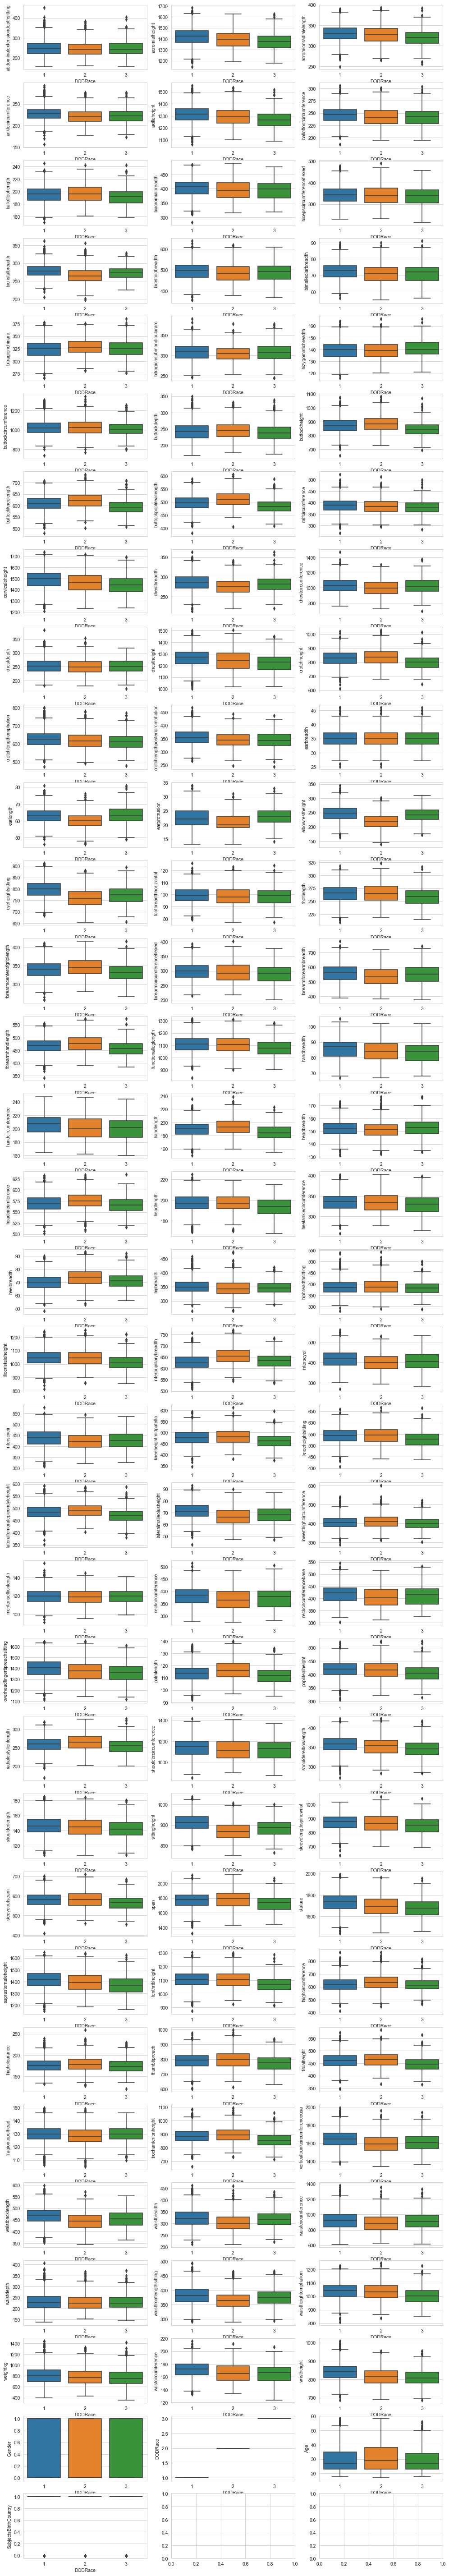

In [53]:
fig, ax = plt.subplots(33,3,figsize=(16,100))
count= 0
for i in df.select_dtypes(include=np.number).columns:
    row = int(count/3)
    column = int(count%3)
    sns.boxplot(x = "DODRace", y = i, data=df, ax=ax[row,column])
    count +=1

In [54]:
df.to_csv("Soldier_Race_ML", index=False)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [3]:
df2 = pd.read_csv("Soldier_Race_ML")
df2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,DODRace,Age,WritingPreference,SubjectsBirthCountry
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,Regular Army,Combat Arms,Other,1,41,Right hand,1
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,Regular Army,Combat Support,New York,1,35,Left hand,1
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1,Regular Army,Combat Support,New York,2,42,Left hand,1
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1,Regular Army,Combat Service Support,Other,1,31,Right hand,1
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1,Regular Army,Combat Service Support,North Carolina,2,21,Right hand,1


In [4]:
X = df2.drop(columns=["DODRace"])
y = df2["DODRace"]

In [5]:
y.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4615, 100) (4615,)
Test set: (1154, 100) (1154,)


In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
def classification_validation(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n"*3, "-*"*30)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


operations = [("column_encode", column_trans),("logistic",LogisticRegression())]
pipe_logistic = Pipeline(operations)
pipe_logistic.fit(X_train,y_train)

y_pred = pipe_logistic.predict(X_test)
y_pred_proba = pipe_logistic.predict_proba(X_test)

#df_logistic = pd.concat([X_test,y_test], axis=1)
#df_logistic["y_pred"] = y_pred # 0-1 olarak 0.5 threshold ile 
#df_logistic["y_pred_proba"] = y_pred_proba[:,1] #1 olanların olasılıklarını almak için 1 yapıyoruz
#print(df_logistic)
classification_validation(pipe_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[730   9  19]
 [ 22 234   4]
 [ 70   8  58]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.93      0.90      0.92       260
           3       0.72      0.43      0.53       136

    accuracy                           0.89      1154
   macro avg       0.85      0.76      0.79      1154
weighted avg       0.88      0.89      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[2932   31   71]
 [  74  941   23]
 [ 259   39  245]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93      3034
           2       0.93      0.91      0.92      1038
           3       0.72      0.45      0.56       543

    accuracy                           0.89      4615
   macro avg       0.85      0.77      0.80      4615
weighted avg       0.88      0.89      0.88      4615



In [10]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipe_logistic, X_train, y_train, scoring = ['precision_macro','recall_macro','f1_macro','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro   0.832
test_recall_macro      0.762
test_f1_macro          0.787
test_accuracy          0.883
dtype: float64

### Logistic Model GridsearchCV

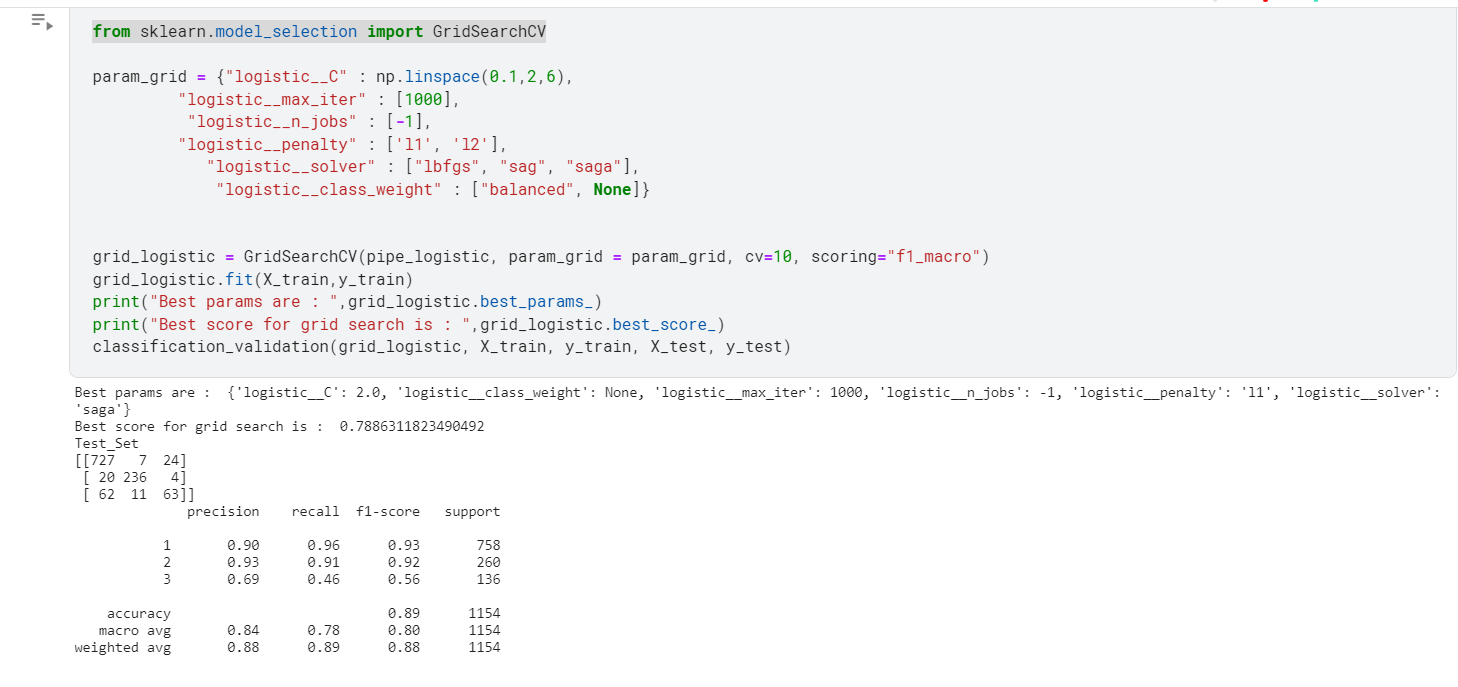

From Kaggle with paramaeters

In [11]:
from sklearn.model_selection import GridSearchCV

# param_grid = {"logistic__C" : np.linspace(0.1,2,6),
#          "logistic__max_iter" : [1000],
#           "logistic__n_jobs" : [-1],
#          "logistic__penalty" : ['l1', 'l2'],
#             "logistic__solver" : ["lbfgs", "sag", "saga"],
#              "logistic__class_weight" : ["balanced",None]}


# grid_logistic = GridSearchCV(pipe_logistic, param_grid = param_grid, cv=10, scoring="f1_macro")
# grid_logistic.fit(X_train,y_train)
# print("Best params are : ",grid_logistic.best_params_)
# print("Best score for grid search is : ",grid_logistic.best_score_)
# classification_validation(grid_logistic, X_train, y_train, X_test, y_test)

In [12]:
operations = [("column_encode", column_trans),("logistic",LogisticRegression(penalty="l1", C=2, max_iter=1000, solver="saga"))]
model_logistic = Pipeline(steps=operations)
model_logistic.fit(X_train, y_train)

Pipeline(steps=[('column_encode',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Component', 'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

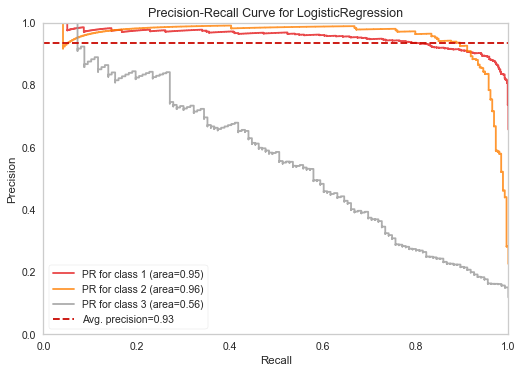

In [13]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(model_logistic,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [14]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = model_logistic.predict(X_test)
pr_3_log = viz.score_[3]
f1_3_log = f1_score(y_test, y_pred, average=None, labels=[3])
f1_macro_log = f1_score(y_test, y_pred ,average="macro")
accuracy_log = accuracy_score(y_test, y_pred)

## 2. SVC

### Vanilla SVC model 

In [15]:
from sklearn.svm import SVC

pipe_svc = Pipeline(steps=[("column_encode", column_trans), ("SVC", SVC())])
pipe_svc.fit(X_train, y_train)
classification_validation(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[740   9   9]
 [ 26 233   1]
 [ 92  11  33]]
              precision    recall  f1-score   support

           1       0.86      0.98      0.92       758
           2       0.92      0.90      0.91       260
           3       0.77      0.24      0.37       136

    accuracy                           0.87      1154
   macro avg       0.85      0.71      0.73      1154
weighted avg       0.86      0.87      0.85      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[3000   12   22]
 [  92  932   14]
 [ 348   31  164]]
              precision    recall  f1-score   support

           1       0.87      0.99      0.93      3034
           2       0.96      0.90      0.93      1038
           3       0.82      0.30      0.44       543

    accuracy                           0.89      4615
   macro avg       0.88      0.73      0.76      4615
weighted avg       0.88      0.89      0.87      4615



In [16]:
scores = cross_validate(pipe_svc, X_train, y_train, scoring = ['precision_macro','recall_macro','f1_macro','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro   0.836
test_recall_macro      0.688
test_f1_macro          0.715
test_accuracy          0.866
dtype: float64

###  SVC Model GridsearchCV

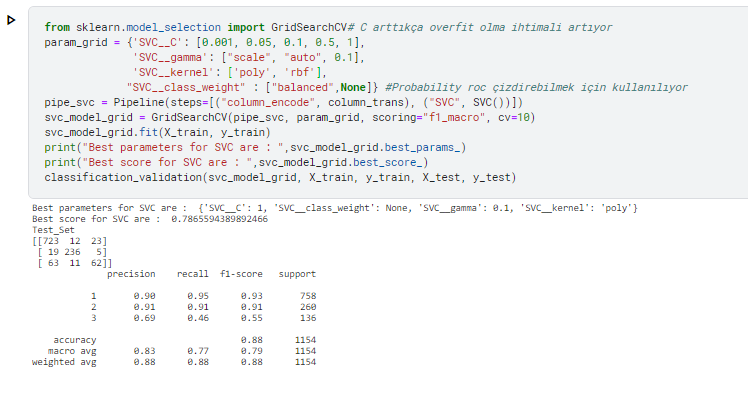


From kaggle with same code

In [17]:
# # C arttıkça overfit olma ihtimali artıyor
# param_grid = {'SVC__C': [0.001, 0.05, 0.1, 0.5, 1],
#               'SVC__gamma': ["scale", "auto", 0.1],
#               'SVC__kernel': ['poly', 'rbf'],
#              "SVC__class_weight" : ["balanced",None]}
# pipe_svc = Pipeline(steps=[("column_encode", column_trans), ("SVC", SVC())])
# svc_model_grid = GridSearchCV(pipe_svc, param_grid, scoring="f1_macro", cv=10)
# svc_model_grid.fit(X_train, y_train)
# print("Best parameters for SVC are : ",svc_model_grid.best_params_)
# print("Best score for SVC are : ",svc_model_grid.best_score_)
# classification_validation(svc_model_grid, X_train, y_train, X_test, y_test)

In [18]:
model_svc = Pipeline(steps=[("column_encode", column_trans), ("SVC", SVC(gamma=0.1, kernel="poly"))])
model_svc.fit(X_train, y_train)

Pipeline(steps=[('column_encode',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Component', 'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('SVC', SVC(gamma=0.1, kernel='poly'))])

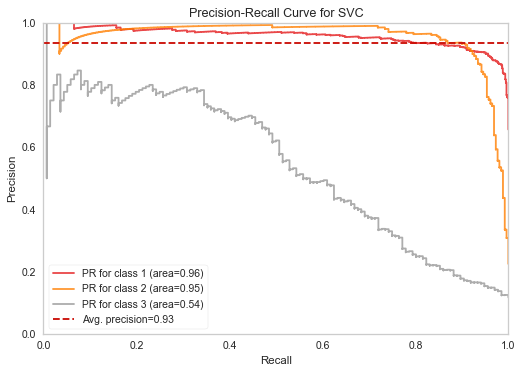

In [19]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(model_svc,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [20]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = model_svc.predict(X_test)
pr_3_svc = viz.score_[3]
f1_3_svc = f1_score(y_test, y_pred, average=None, labels=[3])
f1_macro_svc = f1_score(y_test, y_pred ,average="macro")
accuracy_svc = accuracy_score(y_test, y_pred)

## 3. RF

### Vanilla RF Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier())]

pipe_rf = Pipeline(steps=operations_rf)
pipe_rf.fit(X_train, y_train)
classification_validation(pipe_rf, X_train, y_train, X_test, y_test)

Test_Set
[[739  17   2]
 [ 59 199   2]
 [111  13  12]]
              precision    recall  f1-score   support

           1       0.81      0.97      0.89       758
           2       0.87      0.77      0.81       260
           3       0.75      0.09      0.16       136

    accuracy                           0.82      1154
   macro avg       0.81      0.61      0.62      1154
weighted avg       0.82      0.82      0.78      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [22]:
scores = cross_validate(pipe_rf, X_train, y_train, scoring = ['precision_macro','recall_macro','f1_macro','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro   0.743
test_recall_macro      0.592
test_f1_macro          0.597
test_accuracy          0.816
dtype: float64

### RF Model GridsearchCV

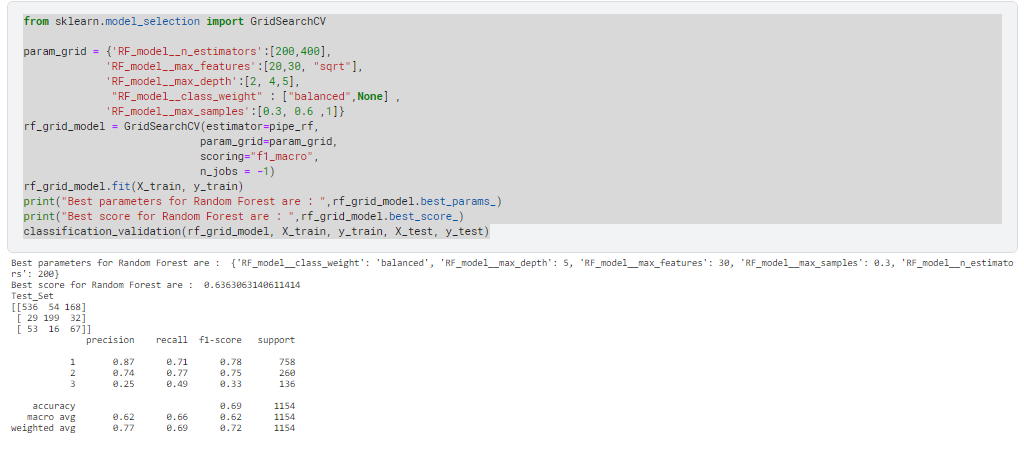

In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'RF_model__n_estimators':[200,400],
#              'RF_model__max_features':[20,30, "sqrt"],
#              'RF_model__max_depth':[2, 4,5],
#               "RF_model__class_weight" : ["balanced",None] ,
#              'RF_model__max_samples':[0.3, 0.6 ,1]} 
# rf_grid_model = GridSearchCV(estimator=pipe_rf,
#                             param_grid=param_grid,
#                             scoring="f1_macro",
#                             n_jobs = -1)
# rf_grid_model.fit(X_train, y_train)
# print("Best parameters for Random Forest are : ",rf_grid_model.best_params_)
# print("Best score for Random Forest are : ",rf_grid_model.best_score_)
# classification_validation(rf_grid_model, X_train, y_train, X_test, y_test)

In [24]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')
model_rf = Pipeline(steps=[("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                            max_depth=5, max_features=30, max_samples=0.3, n_estimators=200))])
model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Component', 'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        max_features=30, max_samples=0.3,
                                        n_estimators=200))])

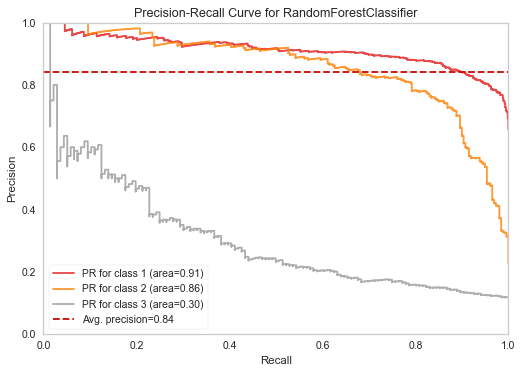

In [25]:
viz = PrecisionRecallCurve(model_rf,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [26]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = model_rf.predict(X_test)
pr_3_rf = viz.score_[3]
f1_3_rf = f1_score(y_test, y_pred, average=None, labels=[3])
f1_macro_rf = f1_score(y_test, y_pred ,average="macro")
accuracy_rf = accuracy_score(y_test, y_pred)

## 4. XGBoost

### Vanilla XGBoost Model

In [27]:
from xgboost import XGBClassifier

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder="passthrough")
operations = [("OrdinalEncoder", column_trans), ("XGB", XGBClassifier())]

pipe_xgb = Pipeline(steps=operations)
pipe_xgb.fit(X_train, y_train)
classification_validation(pipe_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[729  20   9]
 [ 38 218   4]
 [ 91  13  32]]
              precision    recall  f1-score   support

           1       0.85      0.96      0.90       758
           2       0.87      0.84      0.85       260
           3       0.71      0.24      0.35       136

    accuracy                           0.85      1154
   macro avg       0.81      0.68      0.70      1154
weighted avg       0.84      0.85      0.83      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[2988   20   26]
 [  97  933    8]
 [ 305   31  207]]
              precision    recall  f1-score   support

           1       0.88      0.98      0.93      3034
           2       0.95      0.90      0.92      1038
           3       0.86      0.38      0.53       543

    accuracy                           0.89      4615
   macro avg       0.90      0.75      0.79      4615
weighted avg       0.89      0.89      0.88      4615



In [28]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(pipe_xgb, X_train, y_train, scoring = ['precision_macro','recall_macro','f1_macro','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro   0.796
test_recall_macro      0.666
test_f1_macro          0.694
test_accuracy          0.845
dtype: float64

### XGBoost Model GridsearchCV

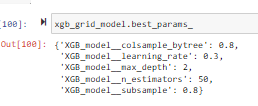

In [29]:
# param_grid = {"XGB_model__n_estimators":[50, 100],
#               'XGB_model__max_depth':[1,2],
#               "XGB_model__learning_rate": [0.1, 0.3],
#               "XGB_model__subsample":[0.8, 1],
#               "XGB_model__colsample_bytree":[0.8, 1]}

# xgb_grid_model = GridSearchCV(pipe_xgb, 
#                               param_grid, 
#                               scoring="f1_macro", 
#                               n_jobs = -1, 
#                               verbose = 2, cv=5).fit(X_train, y_train)
# print("Best parameters for XG boosting are : ",xgb_grid.best_params_)
# print("Best score for XG boosting are : ",xgb_grid.best_score_)
# classification_validation(xgb_grid, X_train, y_train, X_test, y_test)

In [34]:
operations = [("column_encode", column_trans),  ("XGB", XGBClassifier(colsample_bytree=0.8, learning_rate=0.3,
                                                                                   max_depth=2, n_estimators=50, subsample=0.8))]
model_xgb = Pipeline(steps=operations)
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('column_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Component', 'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.3,
                               max_depth=2, n_estimators=50,
                               objective='multi:softprob', subsample=0.8))])

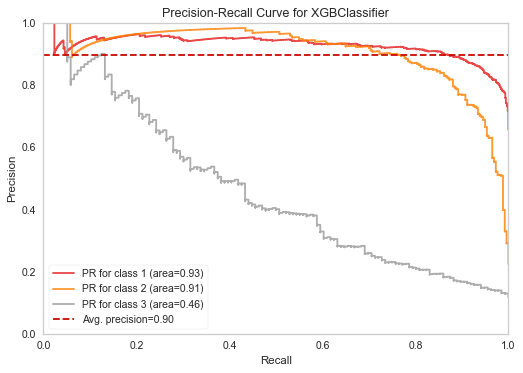

In [33]:
operations = [("column_encode", column_trans),  ("XGB", XGBClassifier(colsample_bytree=0.8, learning_rate=0.3,
                                                                                   max_depth=2, n_estimators=50, subsample=0.8))]
model_xgb = Pipeline(steps=operations)
viz = PrecisionRecallCurve(model_xgb,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [35]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = model_xgb.predict(X_test)

pr_3_xgb = viz.score_[3]
f1_3_xgb = f1_score(y_test, y_pred, average=None, labels=[3])
f1_macro_xgb = f1_score(y_test, y_pred ,average="macro")
accuracy_xgb = accuracy_score(y_test, y_pred)

In [ ]:
f1_3_xgb[0]

## Compare Models 

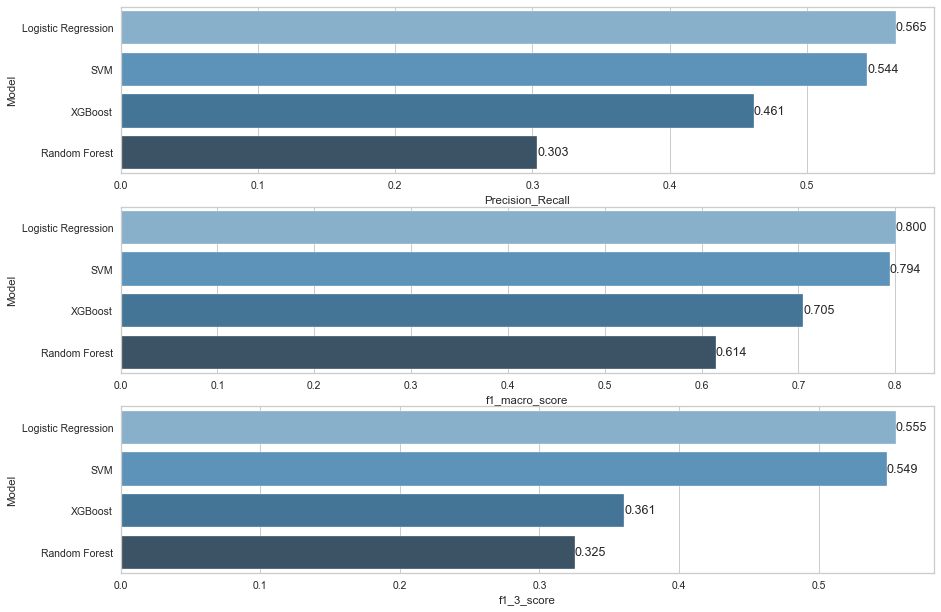

In [36]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "Precision_Recall": [pr_3_log,pr_3_svc,pr_3_rf,pr_3_xgb],
                        "f1_macro_score": [f1_macro_log,f1_macro_svc,f1_macro_rf,f1_macro_xgb],
                        "f1_3_score": [f1_3_log[0],f1_3_svc[0],f1_3_rf[0],f1_3_xgb[0]]})

###Burada farklı sonuçları karşılaştırmak adına, her modellemeden sonra bunları almalıyız.###
###Aldığımız bu sonuçları yan bar grafik olarak döndürmemizi sağloyor. Sonuçlar yukarıda olduğu gibi alınmalı###


def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision_Recall", ascending=False)
ax=sns.barplot(x="Precision_Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="f1_macro_score", ascending=False)
ax=sns.barplot(x="f1_macro_score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="f1_3_score", ascending=False)
ax=sns.barplot(x="f1_3_score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [66]:
cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("column_encode", column_trans),("logistic",LogisticRegression(penalty="l1", C=2, max_iter=1000, solver="saga"))]
final_model = Pipeline(steps=operations)
final_model.fit(X, y)

Pipeline(steps=[('column_encode',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Component', 'Branch',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [67]:
import pickle
pickle.dump(final_model, open("final_model_soldier_race", 'wb'))

In [68]:
mean_person = X.mean()
mean_person["Gender"] = 1
mean_person["Component"] = "Regular Army"
mean_person["Branch"] = "Combat Service Support"
mean_person["SubjectsBirthLocation"] = "California"
mean_person["WritingPreference"] = "Right hand"
mean_person["SubjectsBirthCountry"] = 1
mean_person = pd.DataFrame(mean_person).T
mean_person

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Age,SubjectsBirthCountry,Component,Branch,SubjectsBirthLocation,WritingPreference
0,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,274.903,491.455,72.335,324.962,306.678,139.529,1022.059,242.234,872.113,610.450,498.332,386.317,1479.952,283.233,1024.207,252.323,1254.290,827.106,622.694,351.880,35.175,62.606,22.227,240.553,786.399,98.915,263.512,339.459,295.662,553.098,467.899,1104.347,85.098,204.216,189.575,152.044,570.424,196.641,333.275,70.834,348.931,386.418,1042.152,632.535,412.774,433.017,476.665,541.377,484.317,69.762,406.943,119.602,376.128,414.555,1390.525,114.107,417.227,259.758,1131.214,354.805,145.202,898.592,868.361,578.013,1766.951,1716.939,1405.392,1101.631,623.584,176.696,791.045,459.389,129.580,884.659,1632.471,460.990,318.410,916.817,230.459,377.352,1033.591,800.981,169.308,831.335,1.000,29.776,1,Regular Army,Combat Service Support,California,Right hand


In [69]:
final_model_pickle = pickle.load(open("final_model_soldier_race", "rb"))
final_model_pickle.predict(mean_person)

array([1], dtype=int64)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___